<a href="https://colab.research.google.com/github/Radhin-Krishna-R/Radhin-Krishna-Trader-Behavior-Insights/blob/main/Trader_Behavior_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
df = pd.read_csv('/content/historical_data.csv')
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [44]:
df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64


In [45]:
df2 = pd.read_csv('/content/fear_greed_index.csv')
df2.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [46]:
df2.dtypes

,0
timestamp,int64
value,int64
classification,object
date,object


In [47]:
trades_df = pd.read_csv('/content/historical_data.csv')
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')

trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], errors='coerce')
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

sentiment_df['Sentiment'] = sentiment_df['classification'].map({'Fear': 0, 'Greed': 1, 'Neutral': 2, 'Extreme Fear': 3, 'Extreme Greed': 4})

trades_df['Date'] = trades_df['Timestamp IST'].dt.date
sentiment_df['Date'] = sentiment_df['date'].dt.date
merged_df = pd.merge(trades_df, sentiment_df, on='Date', how='left')

In [48]:
# Group by Date for aggregation
daily_summary = merged_df.groupby('Date').agg({
    'Execution Price': 'mean',
    'Size Tokens': 'sum',
    'Size USD': 'mean',
    'Closed PnL': ['mean', 'sum'],
    'Account': 'nunique',
    'Sentiment': 'first'
})

daily_summary.columns = ['Avg_Exec_Price', 'Total_Size_Tokens', 'Avg_Size_USD', 'Avg_PnL', 'Total_PnL', 'Active_Traders', 'Sentiment']
daily_summary.reset_index(inplace=True)

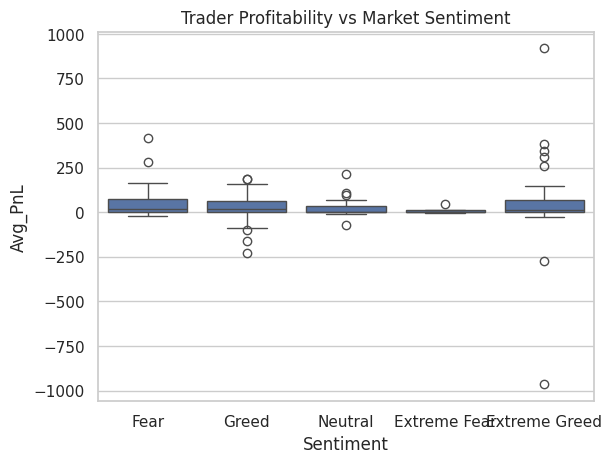

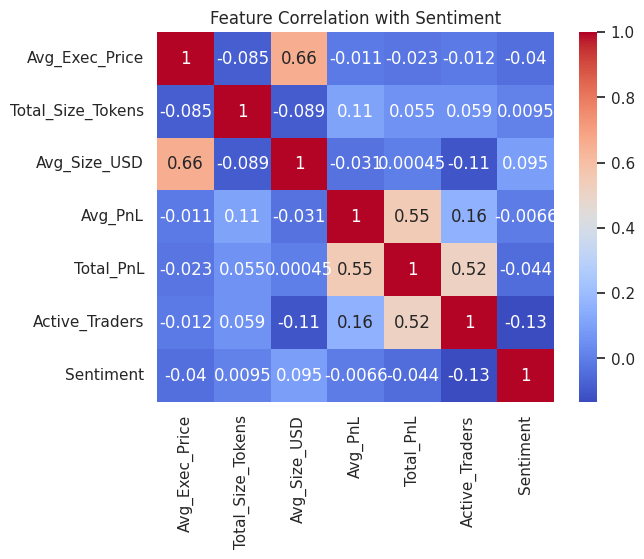

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot PnL against Sentiment
sns.boxplot(data=daily_summary, x='Sentiment', y='Avg_PnL')
plt.title('Trader Profitability vs Market Sentiment')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Fear', 'Greed', 'Neutral', 'Extreme Fear', 'Extreme Greed'])
plt.show()

# Correlation heatmap
corr = daily_summary.drop(columns=['Date']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Sentiment')
plt.show()

In [50]:
sentiment_map = {
    0: 'Fear',
    1: 'Greed',
    2: 'Neutral',
    3: 'Extreme Fear',
    4: 'Extreme Greed'
}
daily_summary['Date'] = pd.to_datetime(daily_summary['Date'])
sns.set(style="whitegrid")

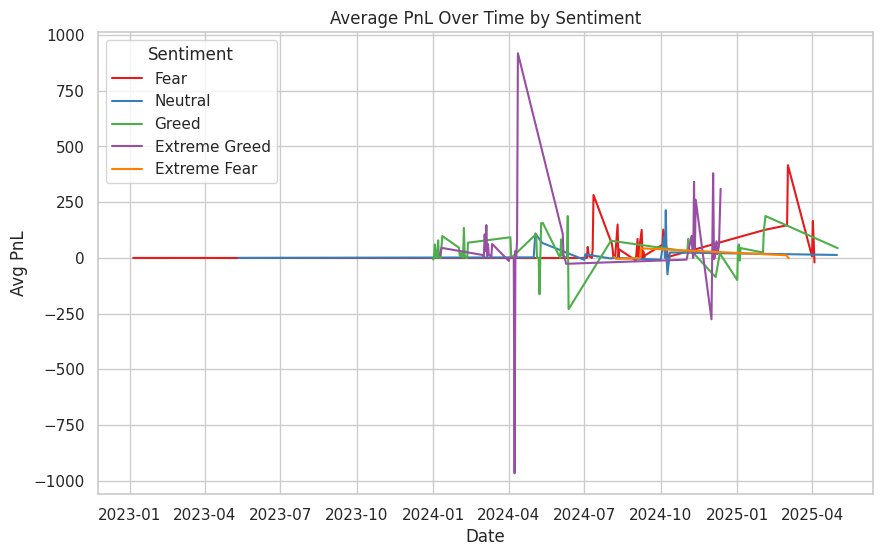

In [51]:
daily_summary['Sentiment_Label'] = daily_summary['Sentiment'].map(sentiment_map)
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_summary, x='Date', y='Avg_PnL', hue='Sentiment_Label', palette='Set1')
plt.title('Average PnL Over Time by Sentiment')
plt.xlabel('Date')
plt.ylabel('Avg PnL')
plt.legend(title='Sentiment')
plt.show()


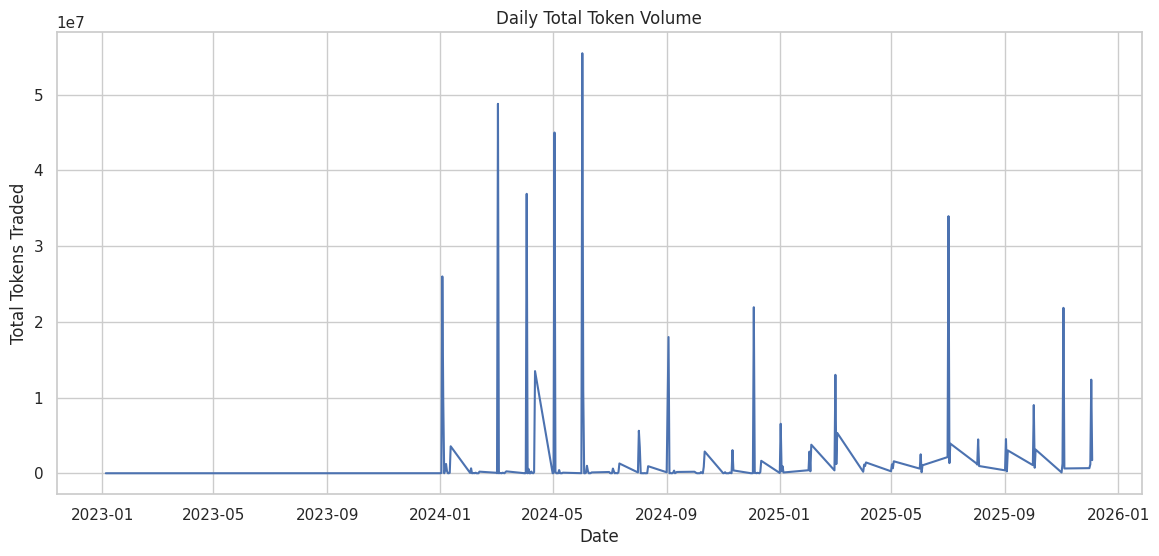

In [52]:
#Time Series: Total Token Size
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_summary, x='Date', y='Total_Size_Tokens')
plt.title('Daily Total Token Volume')
plt.xlabel('Date')
plt.ylabel('Total Tokens Traded')
plt.show()

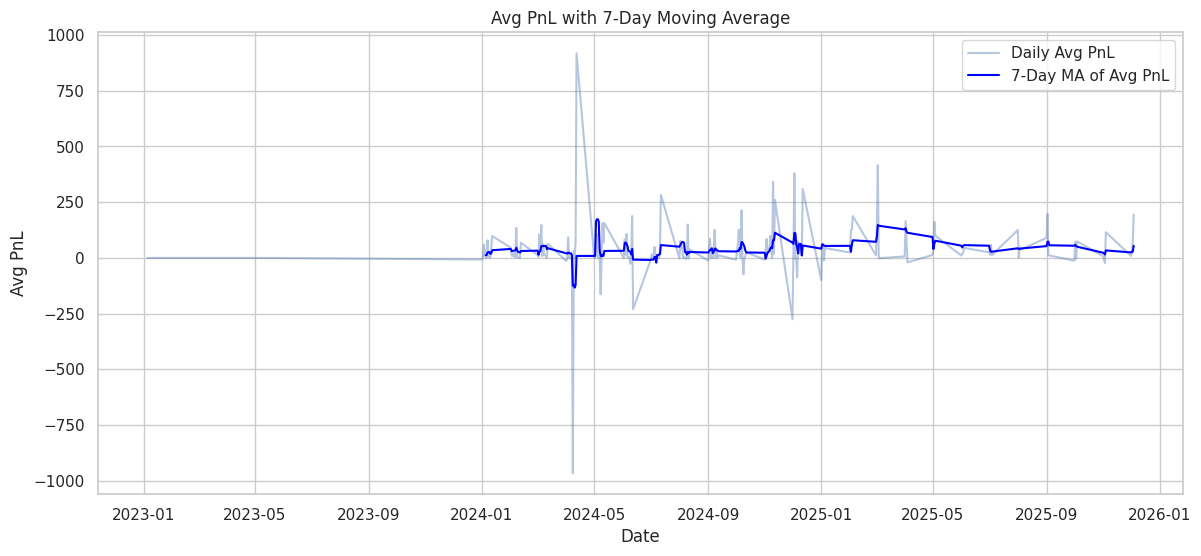

In [53]:
# Moving Average of PnL
daily_summary['PnL_MA7'] = daily_summary['Avg_PnL'].rolling(window=7).mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_summary, x='Date', y='Avg_PnL', label='Daily Avg PnL', alpha=0.4)
sns.lineplot(data=daily_summary, x='Date', y='PnL_MA7', label='7-Day MA of Avg PnL', color='blue')
plt.title('Avg PnL with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Avg PnL')
plt.legend()
plt.show()

In [56]:
!pip install calplot

(<Figure size 1250x340 with 3 Axes>,
 array([<Axes: ylabel='2024'>, <Axes: ylabel='2025'>], dtype=object))

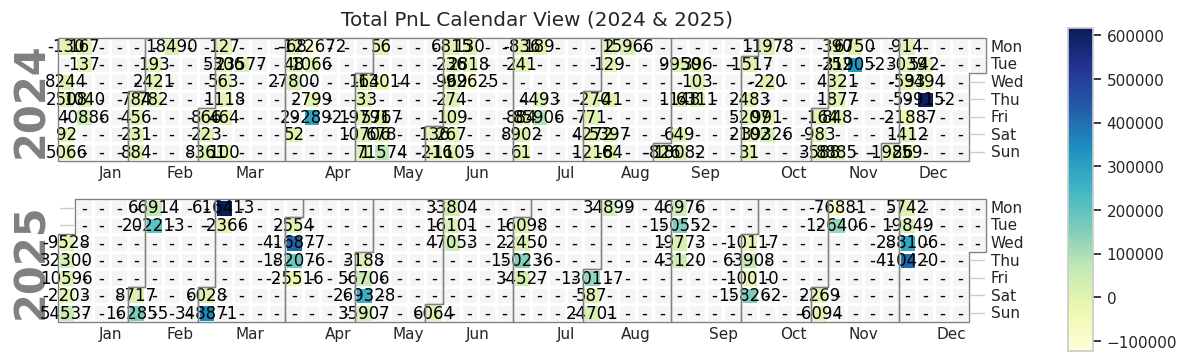

In [ ]:
import calplot

daily_summary['Date'] = pd.to_datetime(daily_summary['Date'])
mask = daily_summary['Date'].dt.year.isin([2024, 2025])
filtered_df = daily_summary[mask]
calplot.calplot(
    filtered_df.set_index('Date')['Total_PnL'],
    cmap='YlGnBu',
    suptitle='Total PnL Calendar View (2024 & 2025)',
    textformat='{:.0f}',
    textfiller='-'
)

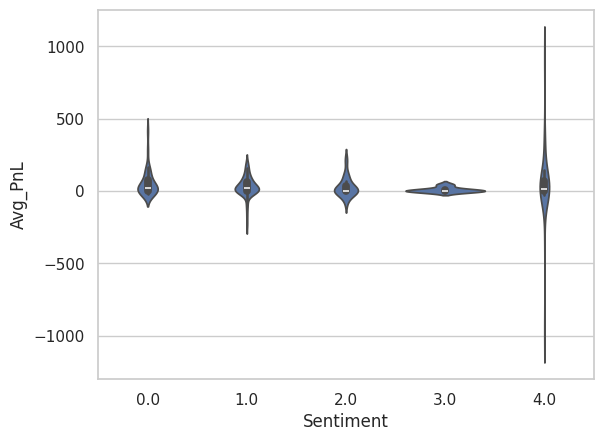

In [59]:
sns.violinplot(data=daily_summary, x='Sentiment', y='Avg_PnL')
plt.show()

In [60]:
import scipy.stats as stats

# Perform ANOVA to test for significant differences in PnL across sentiment groups
sentiment_groups = [daily_summary['Avg_PnL'][daily_summary['Sentiment'] == i] for i in range(5)]
f_statistic, p_value = stats.f_oneway(*sentiment_groups)

print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA P-value: {p_value}")

if p_value < 0.05:
    print("The difference in average PnL between sentiment groups is statistically significant.")
else:
    print("The difference in average PnL between sentiment groups is not statistically significant.")

ANOVA F-statistic: 0.34695556822892387
ANOVA P-value: 0.8458341460033986
The difference in average PnL between sentiment groups is not statistically significant.


##Post-Hoc Statistical Test: Tukey’s HSD
This test compares every pair of sentiment groups to see if the mean profit and loss (PnL) between them is statistically significantly different.

| Column             | Meaning                                                                                   |
| ------------------ | ----------------------------------------------------------------------------------------- |
| `group1`, `group2` | The pair of sentiment groups being compared (0–4)                                         |
| `meandiff`         | Difference in average PnL between the two groups                                          |
| `p-adj`            | Adjusted p-value after multiple comparisons correction                                    |
| `lower`, `upper`   | Confidence interval for the mean difference                                               |
| `reject`           | Whether the difference is statistically significant at 95% confidence (`True` or `False`) |


In [61]:
pip install statsmodels

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
   0.0    1.0 -27.1639 0.8849 -107.8048   53.477  False
   0.0    2.0 -28.0289 0.9606  -141.919  85.8611  False
   0.0    3.0 -47.3606 0.9359 -214.8805 120.1593  False
   0.0    4.0  -9.4771 0.9981  -94.8301  75.8758  False
   1.0    2.0   -0.865    1.0 -108.7649 107.0349  False
   1.0    3.0 -20.1967 0.9971 -183.7031 143.3098  False
   1.0    4.0  17.6868 0.9696   -59.492  94.8656  False
   2.0    3.0 -19.3317 0.9984 -201.5468 162.8835  False
   2.0    4.0  18.5518 0.9907  -92.9137 130.0173  False
   3.0    4.0  37.8835 0.9699 -127.9976 203.7646  False
-------------------------------------------------------


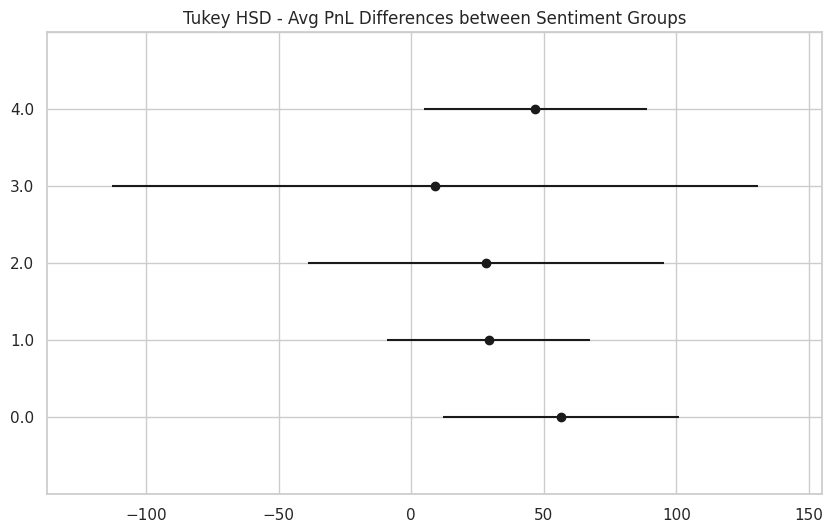

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

anova_data = daily_summary[['Avg_PnL', 'Sentiment']].dropna()

# Tukey's HSD
tukey = pairwise_tukeyhsd(endog=anova_data['Avg_PnL'], groups=anova_data['Sentiment'], alpha=0.05)
print(tukey.summary())
tukey.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD - Avg PnL Differences between Sentiment Groups")
plt.show()

0 → Fear

1 → Greed

2 → Neutral

3 → Extreme Fear

4 → Extreme Greed


 Row: 0.0 vs 1.0 → Fear vs Greed
meandiff = -19.7656: On average, Fear days had about $19.77 lower PnL than Greed days.

p-adj = 0.9354: Very high p-value → not significant

reject = False: No statistical evidence of difference

* Row: 1.0 vs 4.0 → Greed vs Extreme Greed
meandiff = 10.29: Slightly higher PnL during Extreme Greed

p-adj = 0.9929: Still not significant

Conclusion: Not a reliable difference

* Largest difference: 3.0 vs 4.0 → Extreme Fear vs Extreme Greed
meandiff = 37.88: On average, Extreme Greed had ~$37.88 higher PnL than Extreme Fear

p-adj = 0.9612: Again, not significant

Large CI range (from -116 to +192) suggests high variance

#Test Conclusion

No pairwise comparison is statistically significant (reject = False in all rows).

This means:

Although differences in PnL exist numerically across sentiment types,

The variance is too high or sample size too small to confirm significance,

Thus, we can't confidently say sentiment group X leads to higher or lower PnL than group Y — statistically speaking.

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

daily_summary['DayOfWeek'] = daily_summary['Date'].dt.dayofweek  # 0=Mon, 6=Sun
daily_summary['Volatility'] = daily_summary['Avg_PnL'].rolling(3).std().fillna(0)

features = ['Avg_Exec_Price', 'Total_Size_Tokens', 'Avg_Size_USD','Avg_PnL', 'Total_PnL', 'Active_Traders','DayOfWeek', 'Volatility']

X = daily_summary[features]
y = daily_summary['Sentiment']

X = X.fillna(X.mean())
y = y.fillna(y.mode()[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.54      0.88      0.67        17
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         1
         4.0       0.50      0.33      0.40         9

    accuracy                           0.47        38
   macro avg       0.21      0.24      0.21        38
weighted avg       0.36      0.47      0.39        38



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
